## Image segmentation
Dividing an image into meaningful parts

_Semantic segmentation_ : All pixels that are part of same object type gets assigned same class  
Ex: A self driving car may classify all pixels that are of pedestrians into pedestrian class

_Instance segementation_ : All pixels that are part of same individual object gets assigned a class
Ex: Each pedestrian is considered different and have its class

- But these require complex architechures, here we are going to do something much simpler  
_Color segementation_ : separate parts of image based on colors   
Example: This may be useful in cases like "Analyze satelitte images to measure amount of forest cover"



In [ ]:
import requests         #Request to get image through url and return byte
from PIL import Image   #To read image
from io import BytesIO  #Takes bytes as input and return an opened file like obeject in memory
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(950.5), np.float64(1536.5), np.float64(-0.5))

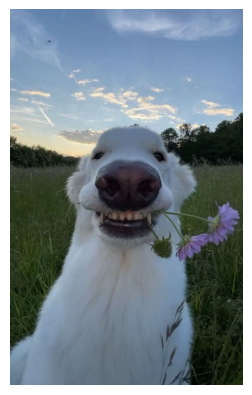

In [15]:
url = "https://i.pinimg.com/1200x/25/7b/3d/257b3d8364dd1bf62c1146beb2ef9e8b.jpg"
response = requests.get(url)

content = BytesIO(response.content)
img = Image.open(content)    #The image can be rendered through this, but it will be large when it renders, we will use imshow

plt.figure(figsize=(3,5))
plt.imshow(img)
plt.axis("off")

In [24]:
img_arr = np.array(img)
print(img_arr.shape)

#To fit the image in model (kmeans) we have to convert it into 2d array (instances:pixels,features:R,G,B)
X = img_arr.reshape(-1,3)
X.shape

(1537, 951, 3)


(1461687, 3)

(Height, Width, Channel:ex:RGB,greyscale,CMY)   

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10,random_state=42,n_init=5,init="k-means++")
kmeans.fit(X)

,n_clusters,10
,init,'k-means++'
,n_init,5
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [58]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]    #Take cluster center for each instance, shape=(n_samples,n_features)
segmented_img = segmented_img.reshape(img_arr.shape)       #Reshape the image into original, shape=(height,width,channel)
segmented_img = segmented_img.astype(np.uint8)             #imshow takes uint8 in [0,255] or float in [0,1], so converting it

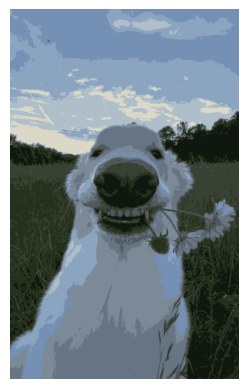

In [59]:
plt.imshow(segmented_img)
plt.axis("off")
plt.show()

whats happening?   
- Each pixel is assigned to the nearest cluster (e.g., green cluster).
- The pixel is replaced with its cluster’s mean color (cluster center).
- Thus, all similar shades map to a single representative shade.
- The flat list of new colors is reshaped back into the original image dimensions.
- Result: image with reduced colors (segmentation by clusters).

In [63]:
## Visualizing for multiple number of clusters 

n_colors = [10,8,6,4,2]
segmented_images = []

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++',n_init=8).fit(X)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(img_arr.shape).astype('uint8')
    segmented_images.append(segmented_image)



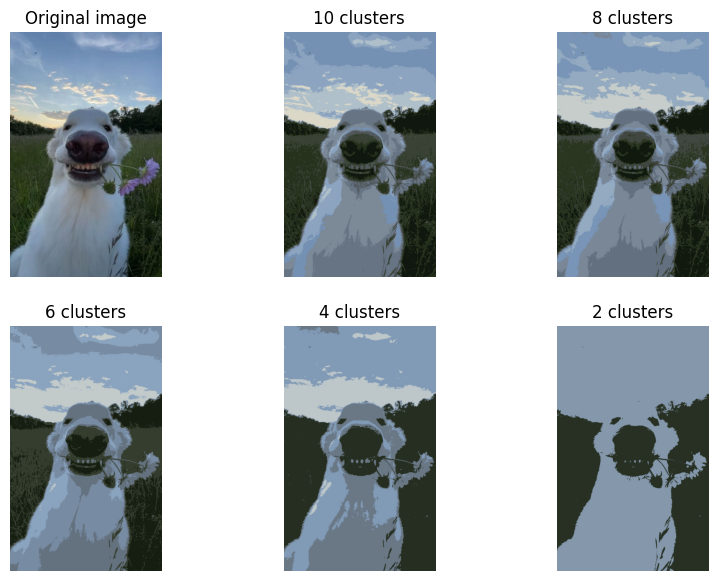

In [70]:
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
plt.imshow(img_arr)
plt.title("Original image")
plt.axis("off")

for idx,img in enumerate(segmented_images):
    plt.subplot(2,3,2+idx)
    plt.imshow(img)
    plt.title(f"{n_colors[idx]} clusters")
    plt.axis("off")

plt.show()

by this we can select required number of clusters and classify image parts as dog,grass,sky,cloud etc